In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import plotly.express as px
import plotly.graph_objs as go
import warnings
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.ensemble import RandomForestRegressor
warnings.filterwarnings('ignore') 

In [9]:
features_df = pd.read_csv('features.csv')
train_df = pd.read_csv('train.csv')
stores_df = pd.read_csv('stores.csv')
test_df = pd.read_csv('test.csv')
sample_submission = pd.read_csv('sampleSubmission.csv')
features_df.describe()
train_df.describe()
stores_df.describe()
test_df.describe()

Store           Dept
count  115064.000000  115064.000000
mean       22.238207      44.339524
std        12.809930      30.656410
min         1.000000       1.000000
25%        11.000000      18.000000
50%        22.000000      37.000000
75%        33.000000      74.000000
max        45.000000      99.000000

In [11]:
feature_store = features.merge(stores, how='inner', on = "Store")

In [12]:
feature_store['Date'] = pd.to_datetime(feature_store['Date'])

In [14]:
# Converting date column to datetime
train['Date'] = pd.to_datetime(train['Date'])
test['Date'] = pd.to_datetime(test['Date'])

# Adding some basic features
feature_store['Day'] = feature_store['Date'].dt.day
feature_store['Week'] = feature_store['Date'].dt.week
feature_store['Month'] = feature_store['Date'].dt.month
feature_store['Year'] = feature_store['Date'].dt.year

In [15]:
train_df = train.merge(feature_store, how='inner', on = ['Store','Date','IsHoliday']).sort_values(by=['Store','Dept','Date']).reset_index(drop=True)

In [16]:
test_df = test.merge(feature_store, how='inner', on = ['Store','Date','IsHoliday']).sort_values(by = ['Store','Dept','Date']).reset_index(drop=True)

In [8]:
train_df.describe()

Store           Dept   Weekly_Sales    Temperature  \
count  421570.000000  421570.000000  421570.000000  421570.000000   
mean       22.200546      44.260317   15981.258123      60.090059   
std        12.785297      30.492054   22711.183519      18.447931   
min         1.000000       1.000000   -4988.940000      -2.060000   
25%        11.000000      18.000000    2079.650000      46.680000   
50%        22.000000      37.000000    7612.030000      62.090000   
75%        33.000000      74.000000   20205.852500      74.280000   
max        45.000000      99.000000  693099.360000     100.140000   

          Fuel_Price      MarkDown1      MarkDown2      MarkDown3  \
count  421570.000000  150681.000000  111248.000000  137091.000000   
mean        3.361027    7246.420196    3334.628621    1439.421384   
std         0.458515    8291.221345    9475.357325    9623.078290   
min         2.472000       0.270000    -265.760000     -29.100000   
25%         2.933000    2240.270000      41.600000       5.080000   
50%         3.452000    5347.450000     192.000000      24.600000   
75%         3.738000    9210.900000    1926.940000     103.990000   
max         4.468000   88646.760000  104519.540000  141630.610000   

           MarkDown4      MarkDown5            CPI   Unemployment  \
count  134967.000000  151432.000000  421570.000000  421570.000000   
mean     3383.168256    4628.975079     171.201947       7.960289   
std      6292.384031    5962.887455      39.159276       1.863296   
min         0.220000     135.160000     126.064000       3.879000   
25%       504.220000    1878.440000     132.022667       6.891000   
50%      1481.310000    3359.450000     182.318780       7.866000   
75%      3595.040000    5563.800000     212.416993       8.572000   
max     67474.850000  108519.280000     227.232807      14.313000   

                Size            Day           Week          Month  \
count  421570.000000  421570.000000  421570.000000  421570.000000   
mean   136727.915739      15.673131      25.826762       6.449510   
std     60980.583328       8.753549      14.151887       3.243217   
min     34875.000000       1.000000       1.000000       1.000000   
25%     93638.000000       8.000000      14.000000       4.000000   
50%    140167.000000      16.000000      26.000000       6.000000   
75%    202505.000000      23.000000      38.000000       9.000000   
max    219622.000000      31.000000      52.000000      12.000000   

                Year  
count  421570.000000  
mean     2010.968591  
std         0.796876  
min      2010.000000  
25%      2010.000000  
50%      2011.000000  
75%      2012.000000  
max      2012.000000

In [17]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 421570 entries, 0 to 421569
Data columns (total 20 columns):
 #   Column        Non-Null Count   Dtype         
---  ------        --------------   -----         
 0   Store         421570 non-null  int64         
 1   Dept          421570 non-null  int64         
 2   Date          421570 non-null  datetime64[ns]
 3   Weekly_Sales  421570 non-null  float64       
 4   IsHoliday     421570 non-null  bool          
 5   Temperature   421570 non-null  float64       
 6   Fuel_Price    421570 non-null  float64       
 7   MarkDown1     150681 non-null  float64       
 8   MarkDown2     111248 non-null  float64       
 9   MarkDown3     137091 non-null  float64       
 10  MarkDown4     134967 non-null  float64       
 11  MarkDown5     151432 non-null  float64       
 12  CPI           421570 non-null  float64       
 13  Unemployment  421570 non-null  float64       
 14  Type          421570 non-null  object        
 15  Size          421

In [10]:
df_weeks = train_df.groupby('Week').sum()

In [11]:
px.line( data_frame = df_weeks, x = df_weeks.index, y = 'Weekly_Sales', labels = {'Weekly_Sales' : 'Weekly Sales', 'x' : 'Weeks' }, title = 'Sales over weeks')

In [12]:
fig1 = go.Figure()
fig1.add_trace(go.Scatter( x = df_weeks.index, y = df_weeks['MarkDown1'], name = 'MarkDown1', mode = 'lines') )
fig1.add_trace(go.Scatter( x = df_weeks.index, y = df_weeks['Weekly_Sales'], name = 'Weekly Sales', mode = 'lines') )
fig1.update_layout(title = 'Sales vs Markdown1', xaxis_title = 'Weeks')

In [13]:
fig2 = go.Figure()
fig2.add_trace(go.Scatter( x = df_weeks.index, y = df_weeks['MarkDown2'], name = 'MarkDownw2', mode = 'lines') )
fig2.add_trace(go.Scatter( x = df_weeks.index, y = df_weeks['Weekly_Sales'], name = 'Weekly Sales', mode = 'lines') )
fig2.update_layout(title = 'Sales vs Markdown2', xaxis_title = 'Weeks')

In [14]:
fig3 = go.Figure()
fig3.add_trace(go.Scatter( x = df_weeks.index, y = df_weeks['MarkDown3'], name = 'MarkDown3', mode = 'lines') )
fig3.add_trace(go.Scatter( x = df_weeks.index, y = df_weeks['Weekly_Sales'], name = 'Weekly Sales', mode = 'lines') )
fig3.update_layout(title = 'Sales vs Markdown3', xaxis_title = 'Weeks')

In [15]:
fig4 = go.Figure()
fig4.add_trace(go.Scatter( x = df_weeks.index, y = df_weeks['MarkDown4'], name = 'MarkDown4', mode = 'lines') )
fig4.add_trace(go.Scatter( x = df_weeks.index, y = df_weeks['Weekly_Sales'], name = 'Weekly Sales', mode = 'lines') )
fig4.update_layout(title = 'Sales vs Markdown4', xaxis_title = 'Weeks')

In [16]:
fig5 = go.Figure()
fig5.add_trace(go.Scatter( x = df_weeks.index, y = df_weeks['MarkDown5'], name = 'MarkDown5', mode = 'lines') )
fig5.add_trace(go.Scatter( x = df_weeks.index, y = df_weeks['Weekly_Sales'], name = 'Weekly Sales', mode = 'lines') )
fig5.update_layout(title = 'Sales vs Markdown5', xaxis_title = 'Weeks')

In [17]:
weekly_sales = train_df.groupby(['Year','Week'], as_index = False).agg({'Weekly_Sales': ['mean', 'median']})
weekly_sales2010 = train_df.loc[train_df['Year']==2010].groupby(['Week']).agg({'Weekly_Sales': ['mean', 'median']})
weekly_sales2011 = train_df.loc[train_df['Year']==2011].groupby(['Week']).agg({'Weekly_Sales': ['mean', 'median']})
weekly_sales2012 = train_df.loc[train_df['Year']==2012].groupby(['Week']).agg({'Weekly_Sales': ['mean', 'median']})

In [18]:
fig7 = go.Figure()
fig7.add_trace(go.Scatter( x = weekly_sales2010['Weekly_Sales']['mean'].index, y = weekly_sales2010['Weekly_Sales']['mean'], name = 'Mean Sales 2010', mode = 'lines') )
fig7.add_trace(go.Scatter( x = weekly_sales2011['Weekly_Sales']['mean'].index, y = weekly_sales2011['Weekly_Sales']['mean'], name = 'Mean Sales 2011', mode = 'lines') )
fig7.add_trace(go.Scatter( x = weekly_sales2012['Weekly_Sales']['mean'].index, y = weekly_sales2012['Weekly_Sales']['mean'], name = 'Mean Sales 2012', mode = 'lines') )
fig7.update_layout(title = 'Sales 2010, 2011, 2012', xaxis_title = 'Weeks')

In [19]:
# Converting the temperature to celsius for a better interpretation
train_df['Temperature'] = train_df['Temperature'].apply(lambda x :  (x - 32) / 1.8)
train_df['Temperature'] = train_df['Temperature'].apply(lambda x :  (x - 32) / 1.8)

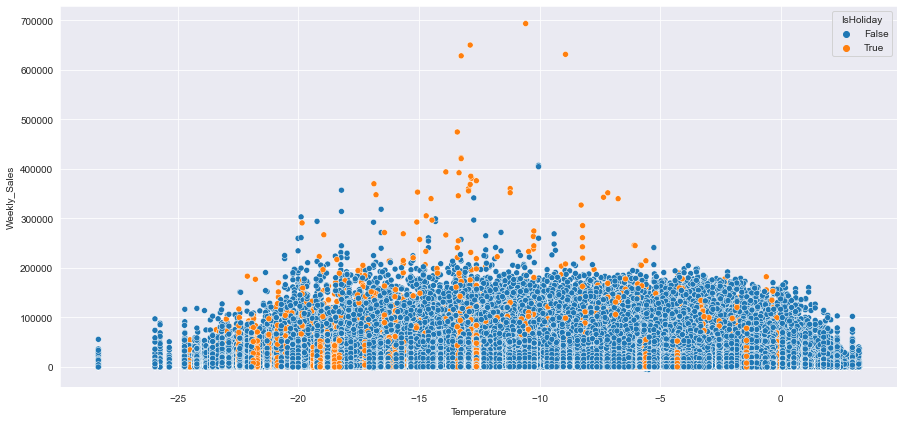

In [20]:
plt.figure (figsize = (15,7))
sns.set_style('darkgrid')
sns.scatterplot ( data = train_df, x = 'Temperature', y =  'Weekly_Sales', hue = 'IsHoliday');

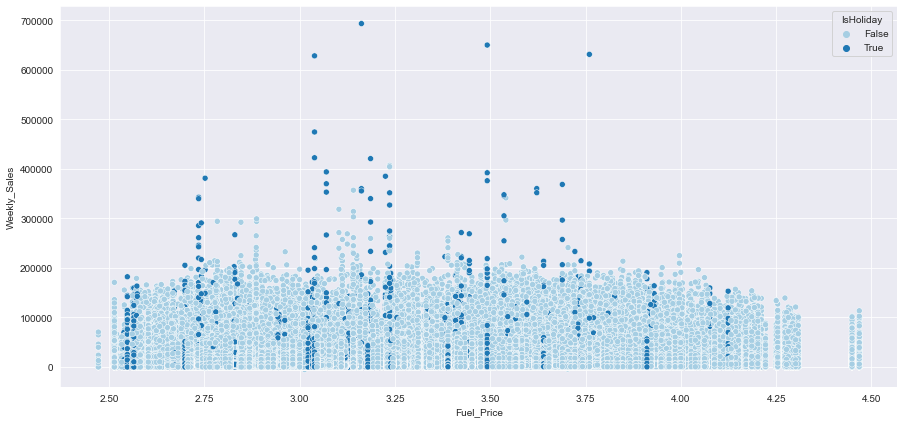

In [21]:
plt.figure (figsize = (15,7))
sns.set_style('darkgrid')
sns.set_palette('Paired')
sns.scatterplot ( data = train_df, x = 'Fuel_Price', y =  'Weekly_Sales', hue = 'IsHoliday');

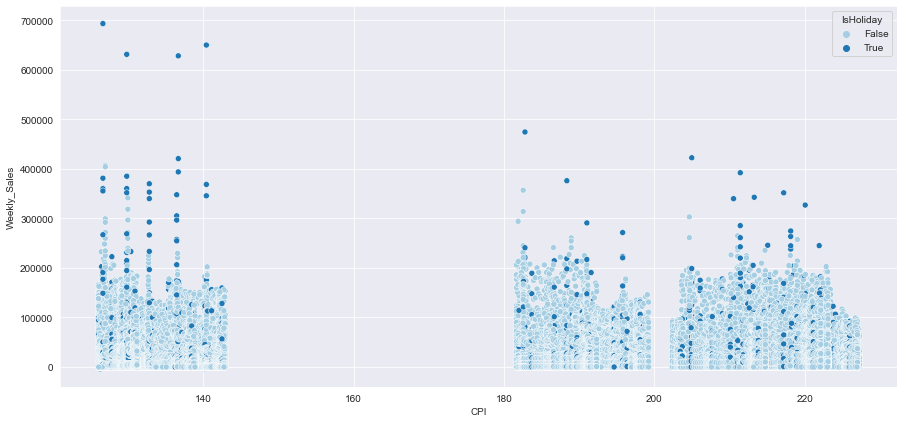

In [22]:
plt.figure (figsize = (15,7))
sns.set_style('darkgrid')
sns.scatterplot ( data = train_df, x = 'CPI', y =  'Weekly_Sales', hue = 'IsHoliday');

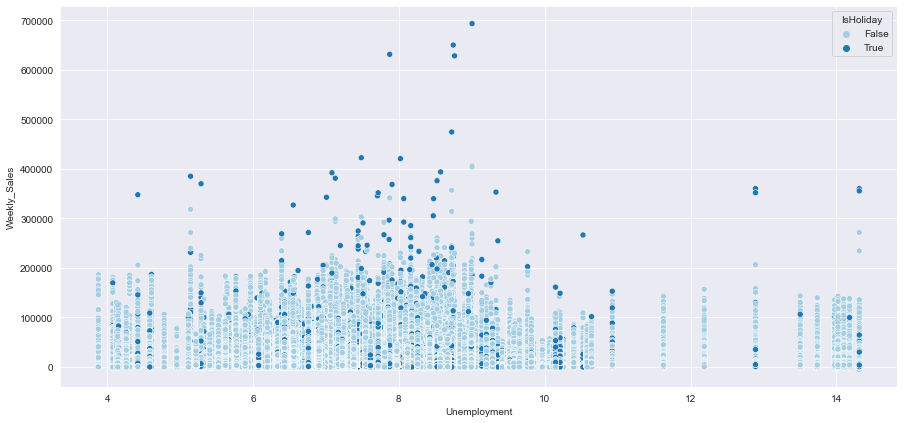

In [23]:
plt.figure (figsize = (15,7))
sns.set_style('darkgrid')
sns.scatterplot ( data = train_df, x = 'Unemployment', y =  'Weekly_Sales', hue = 'IsHoliday' );

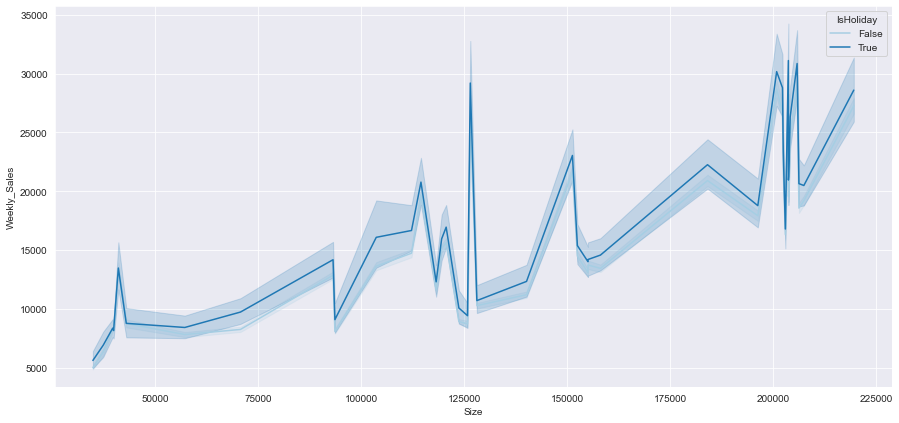

In [24]:
plt.figure (figsize = (15,7))
sns.set_style('darkgrid')
sns.lineplot ( data = train_df, x = 'Size', y =  'Weekly_Sales', hue = 'IsHoliday');

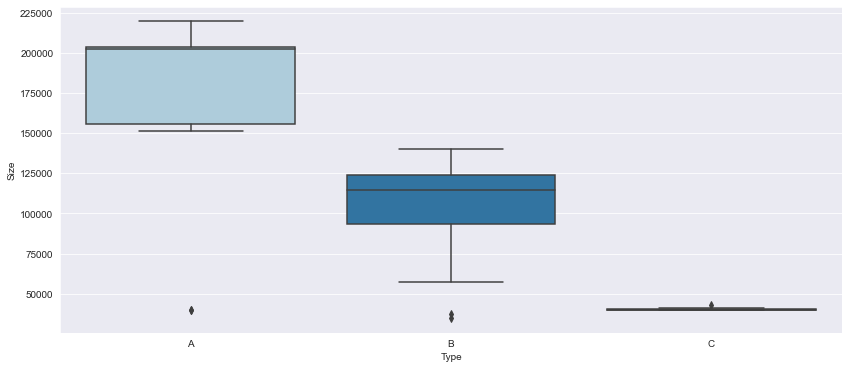

In [25]:
store_type = pd.concat([stores['Type'], stores['Size']], axis=1)
plt.figure(figsize=(14, 6))
sns.boxplot(x='Type', y='Size', data=store_type);

In [ ]:
store_sale = pd.concat([stores['Type'], train_df['Weekly_Sales']], axis=1)
plt.figure(figsize=(14, 6))
sns.boxplot(x='Type', y='Weekly_Sales', data=store_sale);

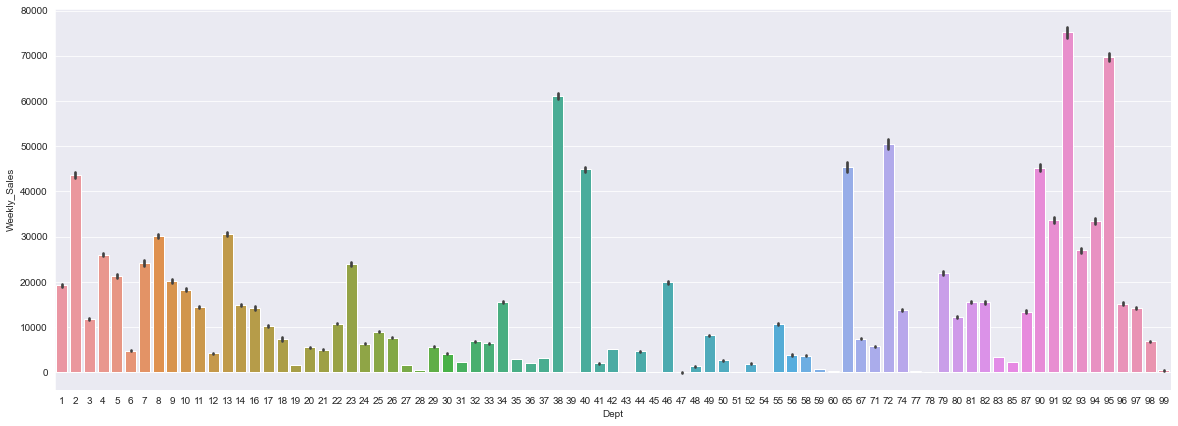

In [27]:
plt.figure (figsize = (20,7))
sns.set_style('darkgrid')
sns.barplot ( data = train_df, x = 'Dept', y =  'Weekly_Sales');

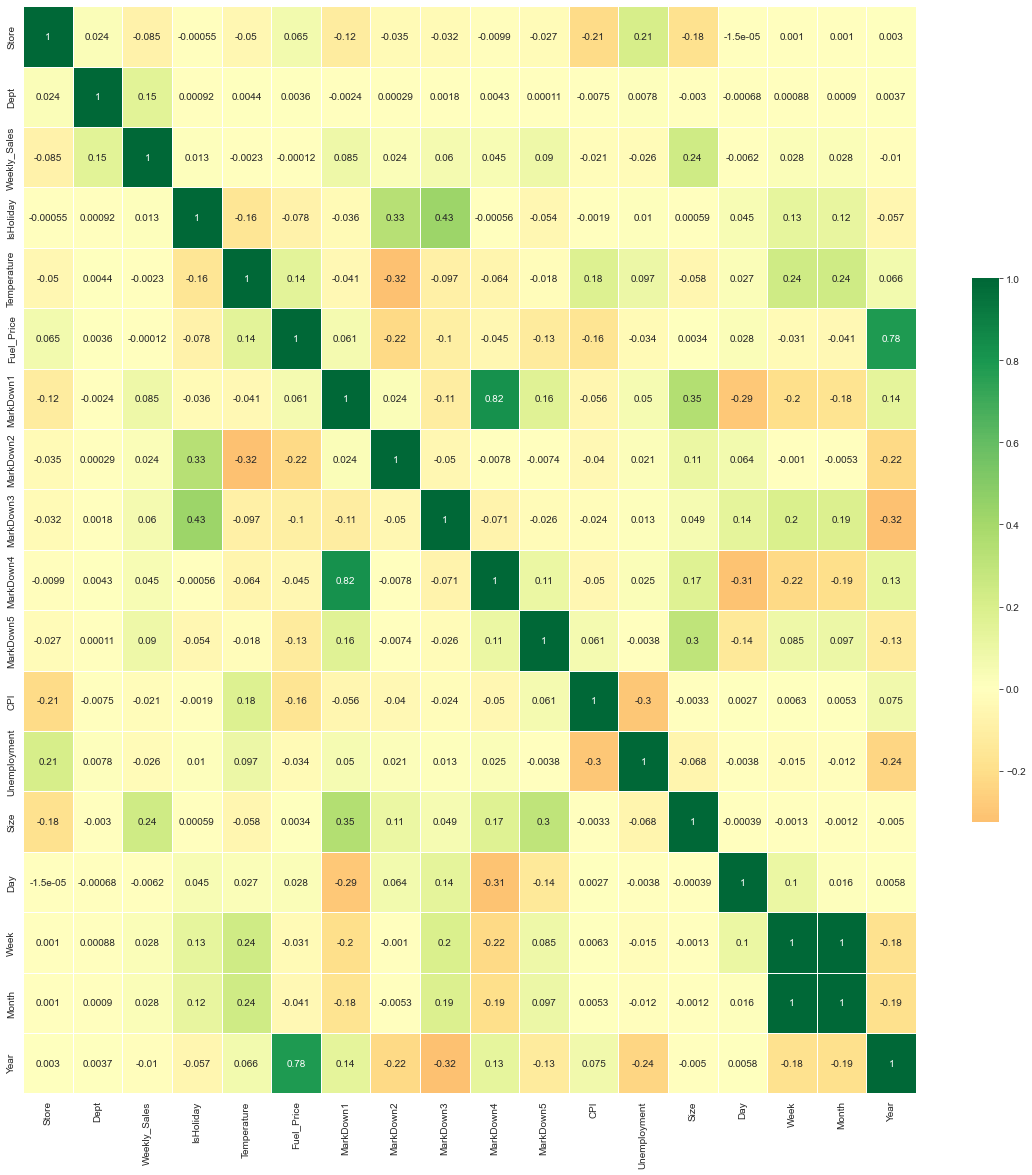

In [28]:
plt.figure(figsize = (20,20))
corr = train_df.corr()
sns.heatmap (corr, cmap= 'RdYlGn', center=0, annot=True, linewidths=.5, cbar_kws={"shrink": .5});

In [29]:
weekly_sales_corr = train_df.corr().iloc[2,:]

In [30]:
corr_df = pd.DataFrame(data = weekly_sales_corr, index = weekly_sales_corr.index ).sort_values (by = 'Weekly_Sales', ascending = False)
corr_df

Weekly_Sales
Weekly_Sales      1.000000
Size              0.243828
Dept              0.148032
MarkDown5         0.090362
MarkDown1         0.085251
MarkDown3         0.060385
MarkDown4         0.045414
Month             0.028409
Week              0.027673
MarkDown2         0.024130
IsHoliday         0.012774
Fuel_Price       -0.000120
Temperature      -0.002312
Day              -0.006187
Year             -0.010111
CPI              -0.020921
Unemployment     -0.025864
Store            -0.085195

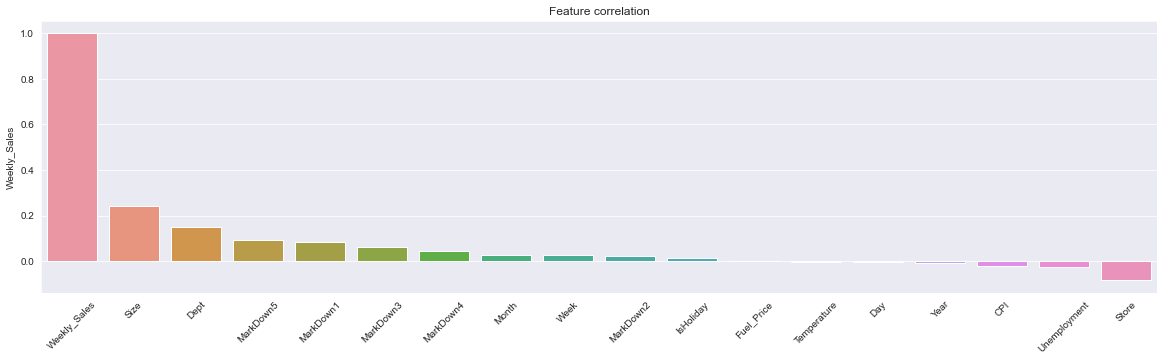

In [31]:
plt.figure(figsize = (20,5))
sns.set_palette('mako')
plt.xticks(rotation = 45)
plt.title('Feature correlation')
sns.barplot (data = corr_df, x = corr_df.index, y = 'Weekly_Sales');

In [32]:
#Feature engineering
data_train = train_df.copy()
data_test = test_df.copy()

In [33]:
#Thanksgiving & Christmas are the most importarnt holidays
data_train['Days_to_Thansksgiving'] = (pd.to_datetime(train_df["Year"].astype(str)+"-11-24", format="%Y-%m-%d") - pd.to_datetime(train_df["Date"], format="%Y-%m-%d")).dt.days.astype(int)
data_train['Days_to_Christmas'] = (pd.to_datetime(train_df["Year"].astype(str)+"-12-24", format="%Y-%m-%d") - pd.to_datetime(train_df["Date"], format="%Y-%m-%d")).dt.days.astype(int)

In [34]:
data_test['Days_to_Thansksgiving'] = (pd.to_datetime(test_df["Year"].astype(str)+"-11-24", format="%Y-%m-%d") - pd.to_datetime(test_df["Date"], format="%Y-%m-%d")).dt.days.astype(int)
data_test['Days_to_Christmas'] = (pd.to_datetime(test_df["Year"].astype(str)+"-12-24", format="%Y-%m-%d") - pd.to_datetime(test_df["Date"], format="%Y-%m-%d")).dt.days.astype(int)

In [35]:
data_train['SuperBowlWeek'] = train_df['Week'].apply(lambda x: 1 if x == 6 else 0)
data_train['LaborDay'] = train_df['Week'].apply(lambda x: 1 if x == 36 else 0)
data_train['Tranksgiving'] = train_df['Week'].apply(lambda x: 1 if x == 47 else 0)
data_train['Christmas'] = train_df['Week'].apply(lambda x: 1 if x == 52 else 0)

In [36]:
data_test['SuperBowlWeek'] = test_df['Week'].apply(lambda x: 1 if x == 6 else 0)
data_test['LaborDay'] = test_df['Week'].apply(lambda x: 1 if x == 36 else 0)
data_test['Tranksgiving'] = test_df['Week'].apply(lambda x: 1 if x == 47 else 0)
data_test['Christmas'] = test_df['Week'].apply(lambda x: 1 if x == 52 else 0)

In [37]:
data_train['MarkdownsSum'] = train_df['MarkDown1'] + train_df['MarkDown2'] + train_df['MarkDown3'] + train_df['MarkDown4'] + train_df['MarkDown5']

In [38]:
data_test['MarkdownsSum'] = test_df['MarkDown1'] + test_df['MarkDown2'] + test_df['MarkDown3'] + test_df['MarkDown4'] + test_df['MarkDown5']

In [39]:
#Fill missing values
data_train.isna().sum()

Store                         0
Dept                          0
Date                          0
Weekly_Sales                  0
IsHoliday                     0
Temperature                   0
Fuel_Price                    0
MarkDown1                270889
MarkDown2                310322
MarkDown3                284479
MarkDown4                286603
MarkDown5                270138
CPI                           0
Unemployment                  0
Type                          0
Size                          0
Day                           0
Week                          0
Month                         0
Year                          0
Days_to_Thansksgiving         0
Days_to_Christmas             0
SuperBowlWeek                 0
LaborDay                      0
Tranksgiving                  0
Christmas                     0
MarkdownsSum             324514
dtype: int64

In [40]:
data_test.isna().sum()

Store                        0
Dept                         0
Date                         0
IsHoliday                    0
Temperature                  0
Fuel_Price                   0
MarkDown1                  149
MarkDown2                28627
MarkDown3                 9829
MarkDown4                12888
MarkDown5                    0
CPI                      38162
Unemployment             38162
Type                         0
Size                         0
Day                          0
Week                         0
Month                        0
Year                         0
Days_to_Thansksgiving        0
Days_to_Christmas            0
SuperBowlWeek                0
LaborDay                     0
Tranksgiving                 0
Christmas                    0
MarkdownsSum             37457
dtype: int64

In [41]:
data_train.fillna(0, inplace = True)

In [42]:
data_test['CPI'].fillna(data_test['CPI'].mean(), inplace = True)
data_test['Unemployment'].fillna(data_test['Unemployment'].mean(), inplace = True)

In [43]:
data_test.fillna(0, inplace = True)

In [44]:
#Encoding categorical data
data_train['IsHoliday'] = data_train['IsHoliday'].apply(lambda x: 1 if x == True else 0)
data_test['IsHoliday'] = data_test['IsHoliday'].apply(lambda x: 1 if x == True else 0)

In [45]:
data_train['Type'] = data_train['Type'].apply(lambda x: 1 if x == 'A' else (2 if x == 'B' else 3))
data_test['Type'] = data_test['Type'].apply(lambda x: 1 if x == 'A' else (2 if x == 'B' else 3))

In [46]:
#Feature selection
data_train.corr()['Weekly_Sales'][:10].sort_values(ascending = False)

Weekly_Sales    1.000000
Dept            0.148032
MarkDown1       0.047172
MarkDown3       0.038562
MarkDown4       0.037467
MarkDown2       0.020716
IsHoliday       0.012774
Fuel_Price     -0.000120
Temperature    -0.002312
Store          -0.085195
Name: Weekly_Sales, dtype: float64

In [47]:
X_f = data_train.drop(['Date','Weekly_Sales'], axis = 'columns' )
y_f = data_train['Weekly_Sales']

In [48]:
rf_features = RandomForestRegressor()

In [49]:
rf_features.fit(X_f, y_f)

RandomForestRegressor()

In [50]:
importance_df = pd.DataFrame({
    'feature': X_f.columns,
    'importance': rf_features.feature_importances_
}).sort_values('importance', ascending=False)

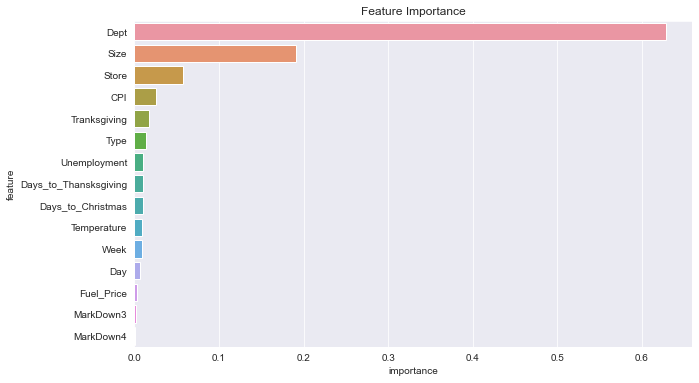

In [51]:
plt.figure(figsize=(10,6))
plt.title('Feature Importance')
sns.barplot(data=importance_df.head(15), x='importance', y='feature');

In [52]:
# To establish a baseline for the first time I'm going train the model with some "original" features. 
X = data_train[['Store','Dept','IsHoliday','Size','Week','Type','Year']]
y = data_train['Weekly_Sales']

In [53]:
# Eval metric for the competition
def WMAE(dataset, real, predicted):
    weights = dataset.IsHoliday.apply(lambda x: 5 if x else 1)
    return np.round(np.sum(weights*abs(real-predicted))/(np.sum(weights)), 2)

In [54]:
#Splitting and training
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)

In [ ]:
RF = RandomForestRegressor()
RF.fit(X_train, y_train)

In [ ]:
preds_train = RF.predict(X_train)

In [ ]:
preds_test = RF.predict(X_test)

In [ ]:
#Evaluation
metrics.mean_squared_error(y_train, preds_train, squared = False)

In [ ]:
metrics.mean_squared_error(y_test, preds_test, squared = False)

In [ ]:
test = data_test[['Store','Dept', 'IsHoliday', 'Size', 'Week', 'Type', 'Year']]
predict = RF.predict(test)

In [ ]:
#Predictions
test = data_test[['Store','Dept', 'IsHoliday', 'Size', 'Week', 'Type', 'Year']]
predict = RF.predict(test)

In [ ]:
predict

In [ ]:
sample_submission['Weekly_Sales'] = predict
sample_submission.to_csv('submission.csv',index=False)

In [ ]:
sample_submission.head()